# Kaggle competition

* https://www.kaggle.com/competitions/child-mind-institute-problematic-internet-use/data

# My work start at here!

Here is the work starting from.

> For the EDA, data cleaning and feature engineering part, please refer to:

```
🔵 EDA: analyse the data and make some meaningful plots and tables!
```


```
🌵 data cleaning and feature engineering!
```



> Modeling


```
🔵 Modeling: build a model using both sequential and tabular data
```



> Model Results


```
🔥 Best model results!
```



> Interpretability and Discussion


```
📙 Interpretability and Discussion
```



> Conclusions

```
Conclusions
```










In [ ]:
import pandas as pd
import pyarrow.parquet as pq
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import os
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# I am opting to mount my Drive these days - grab the data yourself from Kaggle!
from google.colab import drive
drive.mount('/content/drive')
dir_tsf = '/content/drive/My Drive/5509/Dataset/child-mind-institute-problematic-internet-use'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🔵 EDA: analyse the data and make some meaningful plots and tables!



> ✅ I start from reading data and make plots and tables to know more about the data.

There are two main types of data:

* Demographic data: the dempgraphic data are in train(1).csv. Here thanks to the Professor, I directly use train(1).csv to get the demograpic data. They will be used in the demographic-branch in the two-branch model.

* Sequential data: the sequential data are in parquet files in series_train.parquet folder from kaggle. They will be used in the sequential-branch in the two-branch model.

Note that for the mean and average of the time series, I will add them as the demographic features in the demographic data using in training of demographic-branch because they have the same data structure.

⛳ It is worth noticing that we should use the same train and test partition from the F24_DS_DL_finalProject_data_withID. So I use the id from X_train_F24_withID.csv, X_test_F24_withID.csv, and join the train_df using 'id' to make sure I use the right train and test partition.



## ⏰ EDA for parquet file

In [ ]:
# read one parquet file data
dir_tsf = '/content/drive/My Drive/5509/Dataset/child-mind-institute-problematic-internet-use'
# Directory paths
parquet_dir = os.path.join(dir_tsf,'series_train.parquet')
parquet_path = os.path.join(parquet_dir,'id=00115b9f/part-0.parquet')
df= pd.read_parquet(parquet_path)
df.drop('step', axis=1, inplace=True)
df

,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0.021536,0.022214,-1.022370,0.022853,-88.280762,0.0,53.000000,4188.000000,56940000000000,4,3,41.0
1,0.022005,0.022187,-1.019740,0.020231,-88.241707,0.0,51.666668,4188.166504,56945000000000,4,3,41.0
2,0.022240,0.022005,-1.019401,0.019893,-88.170067,0.0,50.333332,4188.333496,56950000000000,4,3,41.0
3,0.021589,0.022578,-1.018177,0.018667,-88.250031,0.0,50.500000,4188.500000,56955000000000,4,3,41.0
4,0.022005,0.023763,-1.014323,0.016848,-88.130775,0.0,33.166668,4181.000000,57235000000000,4,3,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43325,-0.008333,-0.023620,-1.006901,0.007224,-88.595741,0.0,0.000000,3824.000000,57580000000000,6,3,85.0
43326,0.048730,-0.076725,-0.953776,0.056839,-85.352219,0.0,0.000000,3824.000000,57640000000000,6,3,85.0
43327,0.387370,0.793151,-0.402214,0.069961,-24.097908,0.0,0.000000,3824.000000,57645000000000,6,3,85.0
43328,0.801953,0.501589,-0.040937,0.045489,-2.113776,0.0,0.000000,3824.000000,57650000000000,6,3,85.0


In [ ]:
# get df's column name as the feature from parquet
# Get the column names as a list
parquet_feature_names = df.columns[:10].tolist()

# Display the feature names
print("Feature Names:", parquet_feature_names)

Feature Names: ['X', 'Y', 'Z', 'enmo', 'anglez', 'non-wear_flag', 'light', 'battery_voltage', 'time_of_day', 'weekday']


* Data descriptions:

Series are used as training data, partitioned by id. Each series is a continuous recording of accelerometer data for a single subject spanning many days.

id - The patient identifier corresponding to the id field in train/test.csv.

step - An integer timestep for each observation within a series.

X, Y, Z - Measure of acceleration, in g, experienced by the wrist-worn watch along each standard axis.

enmo - As calculated and described by the wristpy package, ENMO is the Euclidean Norm Minus One of all accelerometer signals (along each of the x-, y-, and z-axis, measured in g-force) with negative values rounded to zero. Zero values are indicative of periods of no motion. While no standard measure of acceleration exists in this space, this is one of the several commonly computed features.

anglez - As calculated and described by the wristpy package, Angle-Z is a metric derived from individual accelerometer components and refers to the angle of the arm relative to the horizontal plane.

non-wear_flag - A flag (0: watch is being worn, 1: the watch is not worn) to help determine periods when the watch has been removed, based on the GGIR definition, which uses the standard deviation and range of the accelerometer data.

light - Measure of ambient light in lux. See ​​here for details.

battery_voltage - A measure of the battery voltage in mV.

time_of_day - Time of day representing the start of a 5s window that the data has been sampled over, with format %H:%M:%S.%9f.

weekday - The day of the week, coded as an integer with 1 being Monday and 7 being Sunday.

quarter - The quarter of the year, an integer from 1 to 4.

relative_date_PCIAT - The number of days (integer) since the PCIAT test was administered (negative days indicate that the actigraphy data has been collected before the test was administered).

In [ ]:
# table 1: describle the time series
df.describe()

,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
count,43330.000000,43330.000000,43330.000000,43330.000000,43330.000000,43330.0,43330.000000,43330.000000,4.333000e+04,43330.000000,43330.0,43330.000000
mean,-0.316384,0.016009,-0.167890,0.047388,-10.580416,0.0,42.296310,4053.579102,5.046215e+13,4.470182,3.0,53.201683
std,0.453665,0.502698,0.585710,0.106353,42.947163,0.0,208.168869,112.401535,1.942842e+13,1.931421,0.0,14.245132
min,-1.746094,-2.905339,-1.048372,0.000000,-89.833092,0.0,0.000000,3824.000000,5.500000e+10,1.000000,3.0,41.000000
25%,-0.684180,-0.309863,-0.649974,0.006432,-41.541863,0.0,2.392969,4028.666748,3.689000e+13,3.000000,3.0,42.000000
50%,-0.366849,0.024974,-0.245378,0.023637,-15.086617,0.0,6.926828,4070.000000,5.347750e+13,5.000000,3.0,50.000000
75%,-0.010677,0.400677,0.204727,0.041420,12.220764,0.0,15.000000,4147.000000,6.640875e+13,6.000000,3.0,53.000000
max,1.507865,1.666354,1.546979,4.004276,89.751656,0.0,2633.250000,4188.500000,8.611000e+13,7.000000,3.0,85.000000


In [ ]:
# table 2:  get the feature in the parquet file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43330 entries, 0 to 43329
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    43330 non-null  float32
 1   Y                    43330 non-null  float32
 2   Z                    43330 non-null  float32
 3   enmo                 43330 non-null  float32
 4   anglez               43330 non-null  float32
 5   non-wear_flag        43330 non-null  float32
 6   light                43330 non-null  float32
 7   battery_voltage      43330 non-null  float32
 8   time_of_day          43330 non-null  int64  
 9   weekday              43330 non-null  int8   
 10  quarter              43330 non-null  int8   
 11  relative_date_PCIAT  43330 non-null  float32
dtypes: float32(9), int64(1), int8(2)
memory usage: 1.9 MB


<Figure size 1500x1200 with 0 Axes>

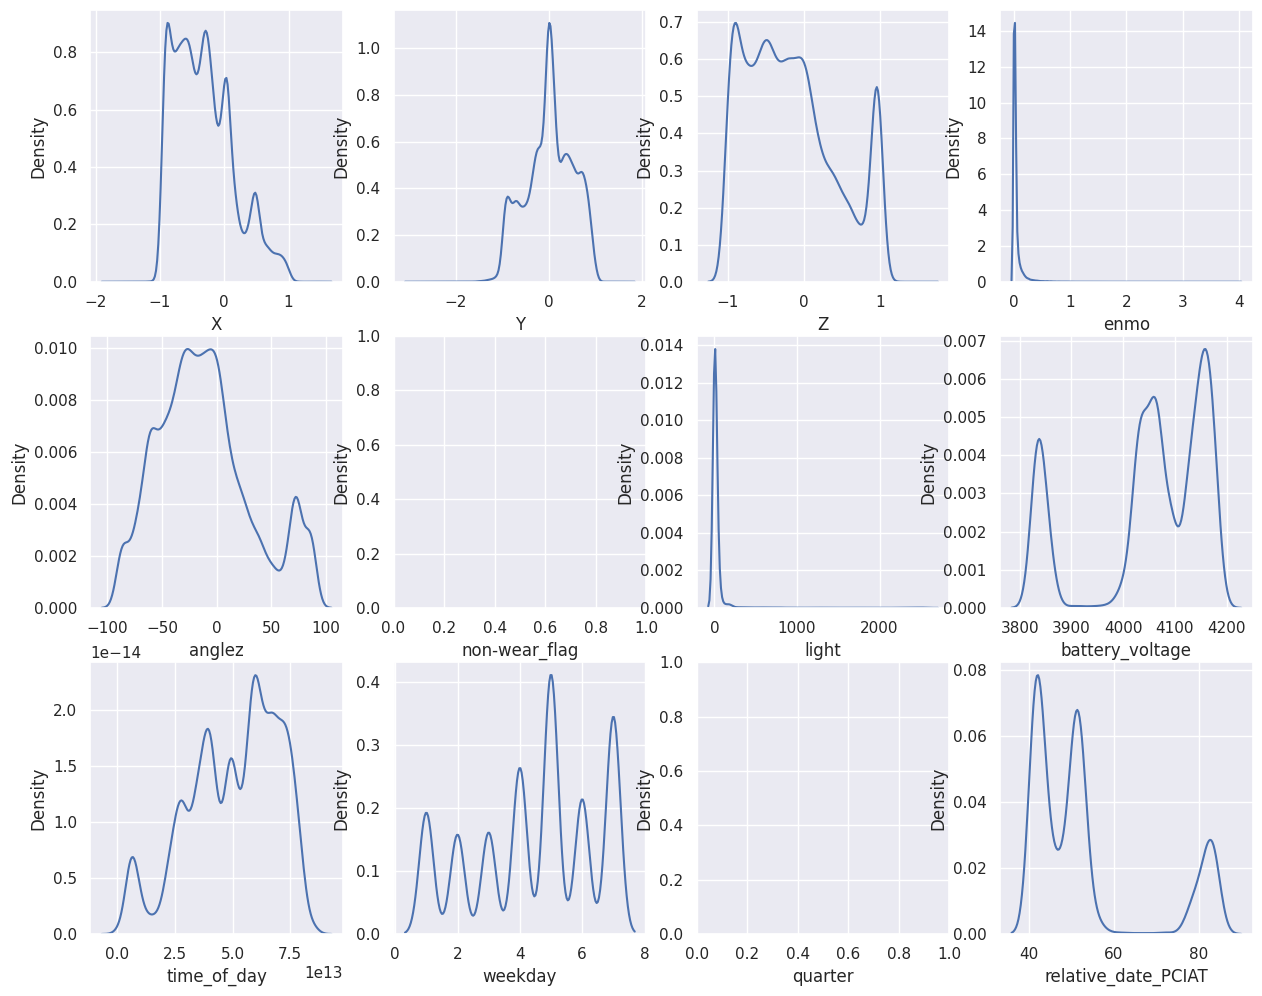

In [ ]:
# plot 1: plot the density map of the features in the parquet file
sns.set_theme(rc={'figure.figsize':(15,12)})
plt.figure(figsize=(15,12))

fig, axes = plt.subplots(3, 4)
for i in range(3):
    for j in range(4):
        sns.kdeplot(ax=axes[i,j], data=df, x=df.columns[i*4+j])

Most features, such as `X`, `Y`, and `Z`, appear to have a normal or multimodal distribution. Some features, like `non-wear_flag` and `quarter`, show binary or discrete distributions, while features such as `light` and `battery_voltage` exhibit skewed distributions, indicating potential preprocessing steps like normalization or transformation might be needed.

## ⏰ EDA for demographic data

In [ ]:
# Load your train DataFrame (ensure you have this already)
train_df = pd.read_csv( '/content/drive/My Drive/5509/Dataset/train.csv') # '/content/drive/My Drive/5509/Dataset/train.csv'


In [ ]:
# table 3: describe the train_df
train_df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [ ]:
# table 4: describle the train_df info to get the features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa


> What I can get from here:
1. Here we can see there are lots of nan in the train.csv.
2. The number of column are larger than the number of ids with parquet file. So the ids without the parquet file need to be droped.
3. There are object and numerical data in the data, and the object type data need more processing steps.





In [ ]:
# table 5: check the target 'sii'
# Create a summary table for 'sii' column
sii_summary = train_df['sii'].value_counts().reset_index()
sii_summary.columns = ['sii_value', 'count']  # Rename columns for clarity
sii_summary['percentage'] = (sii_summary['count'] / len(train_df)) * 100  # Add percentage column

# Display the table
print(sii_summary)

   sii_value  count  percentage
0        0.0   1594   40.252525
1        1.0    730   18.434343
2        2.0    378    9.545455
3        3.0     34    0.858586




> Insight:
The target has 4 unique types and if we see it from this 4 classes, it is imbalanced. As we treat it as a binary classification problem, the dataset is not so imbalanced later.



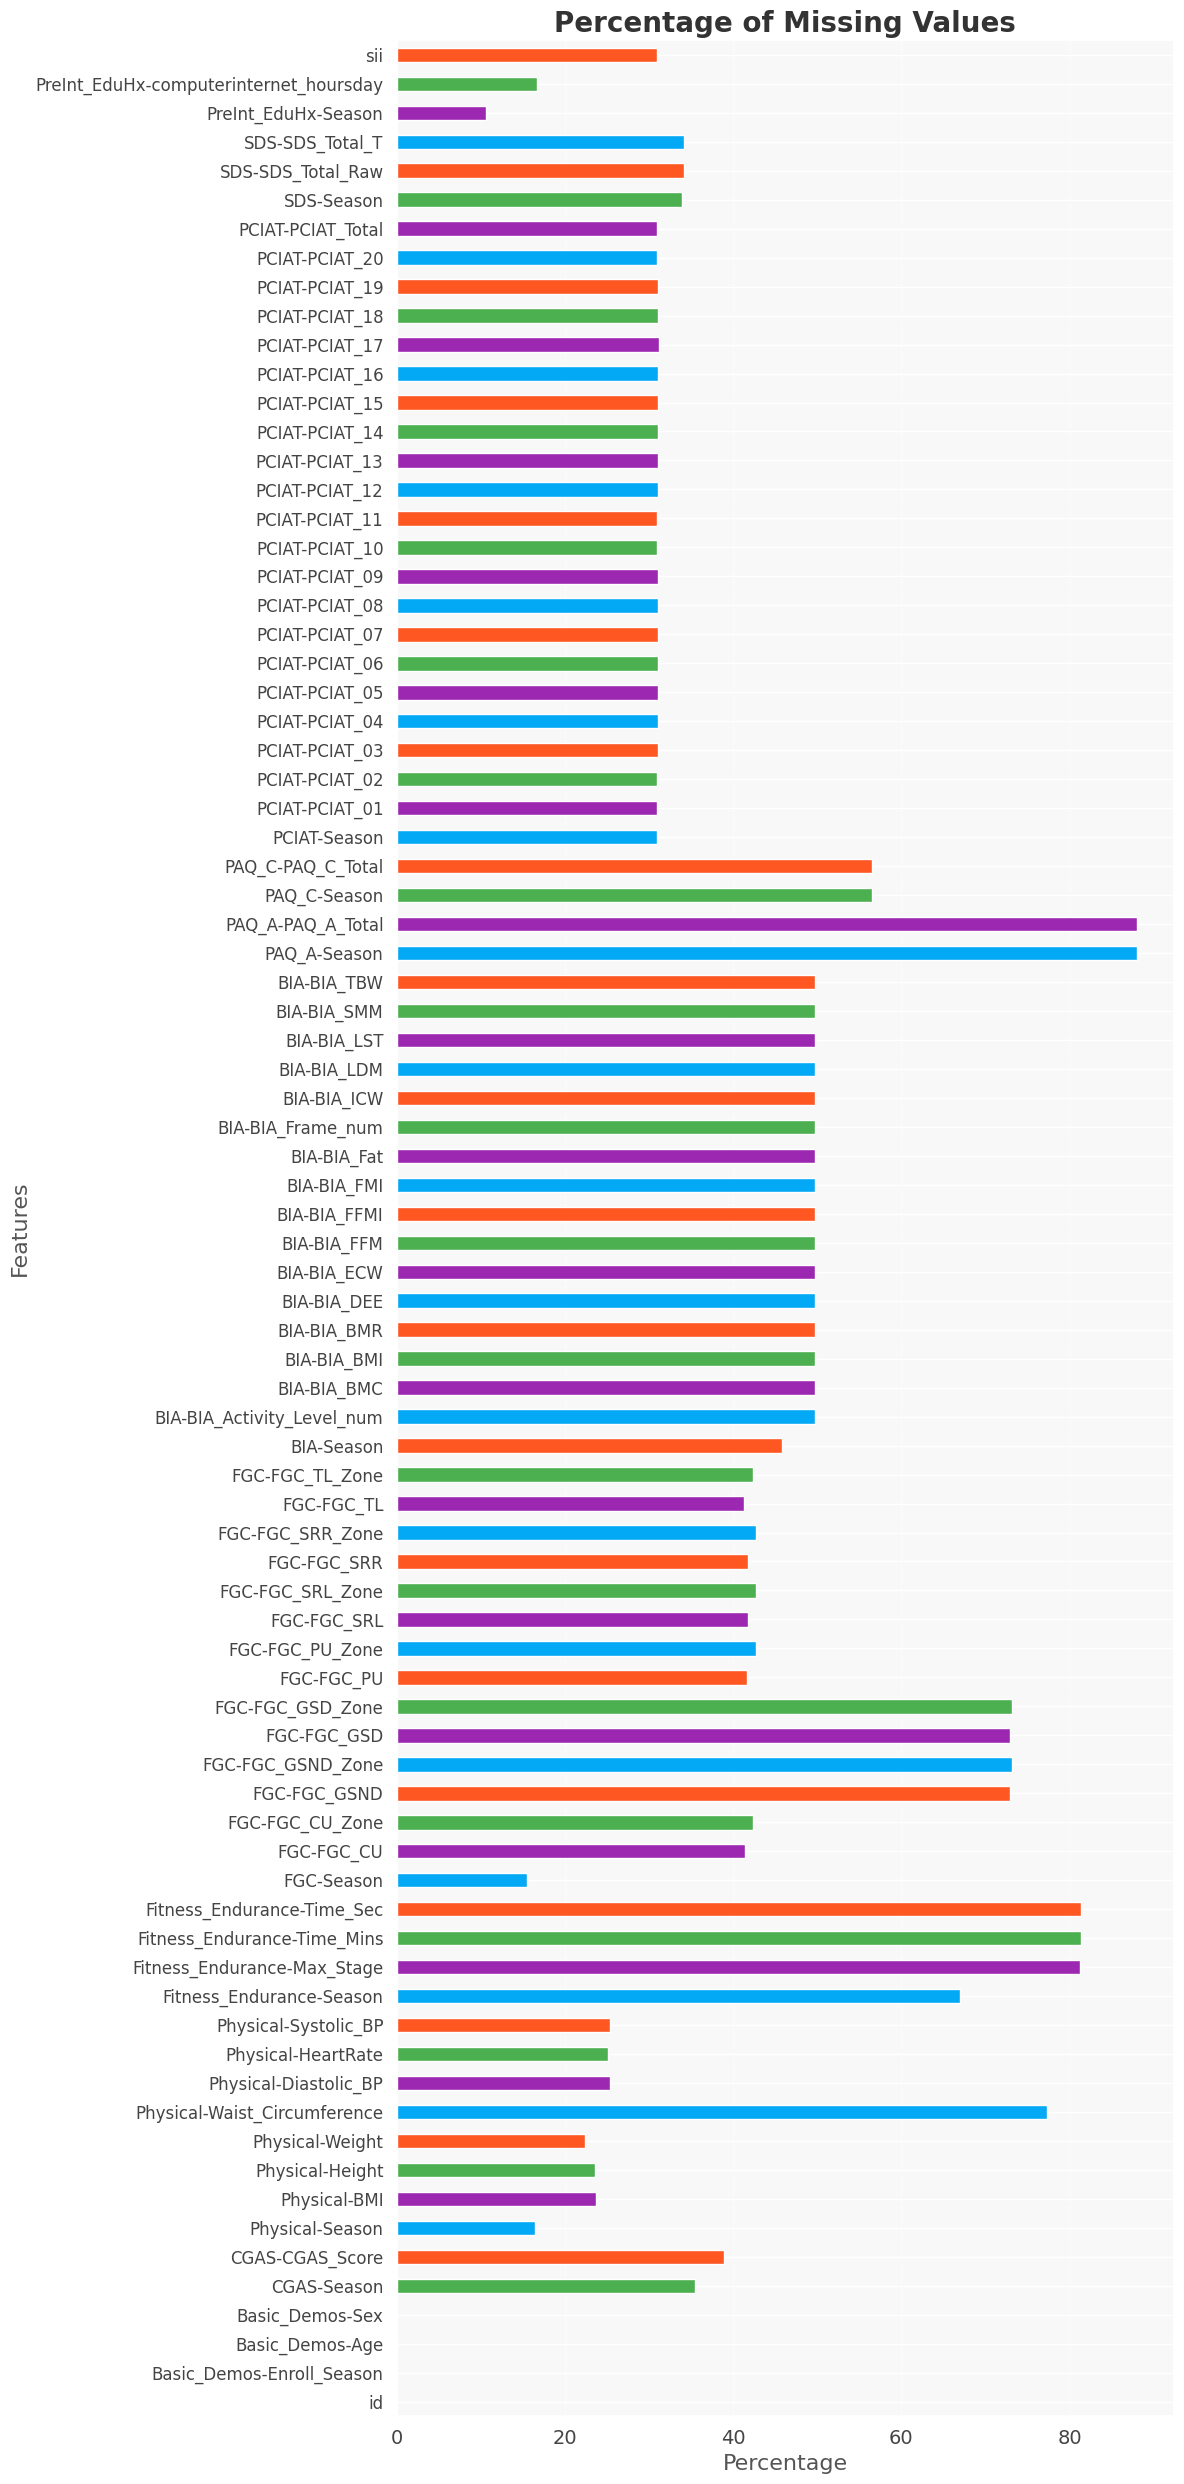

In [ ]:
# check the missing values!
# plot 2: the percentage of the missing values

# Calculate the percentage of missing values
missing_values = train_df.isnull().mean() * 100

# Plot the missing values as a horizontal bar chart
plt.figure(figsize=(12, 25))
missing_values.plot(kind='barh', color=['#4CAF50', '#FF5722', '#03A9F4', '#9C27B0'])

# Add title and labels
plt.title('Percentage of Missing Values', fontsize=20, color='#333333', weight='bold')
plt.xlabel('Percentage', fontsize=16, color='#555555')
plt.ylabel('Features', fontsize=16, color='#555555')

# Customize the grid and background
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#F8F8F8')

# Tweak tick parameters
plt.xticks(fontsize=14, color='#444444')
plt.yticks(fontsize=12, color='#444444')

# Show the plot
plt.tight_layout()
plt.show()


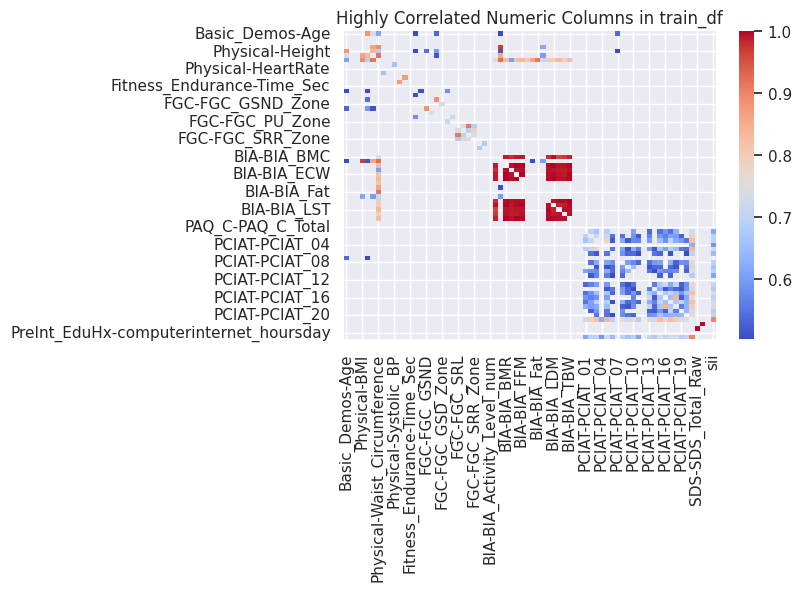

In [ ]:
# analyse the correlation of the features and target
# plot3: plot the correlation between each feature and target
# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Filter for correlations above a threshold
threshold = 0.5
high_correlation = correlation_matrix[(correlation_matrix >= threshold) & (correlation_matrix < 1)]

plt.figure(figsize=(6, 4))
sns.heatmap(high_correlation, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Highly Correlated Numeric Columns in train_df")
plt.show()


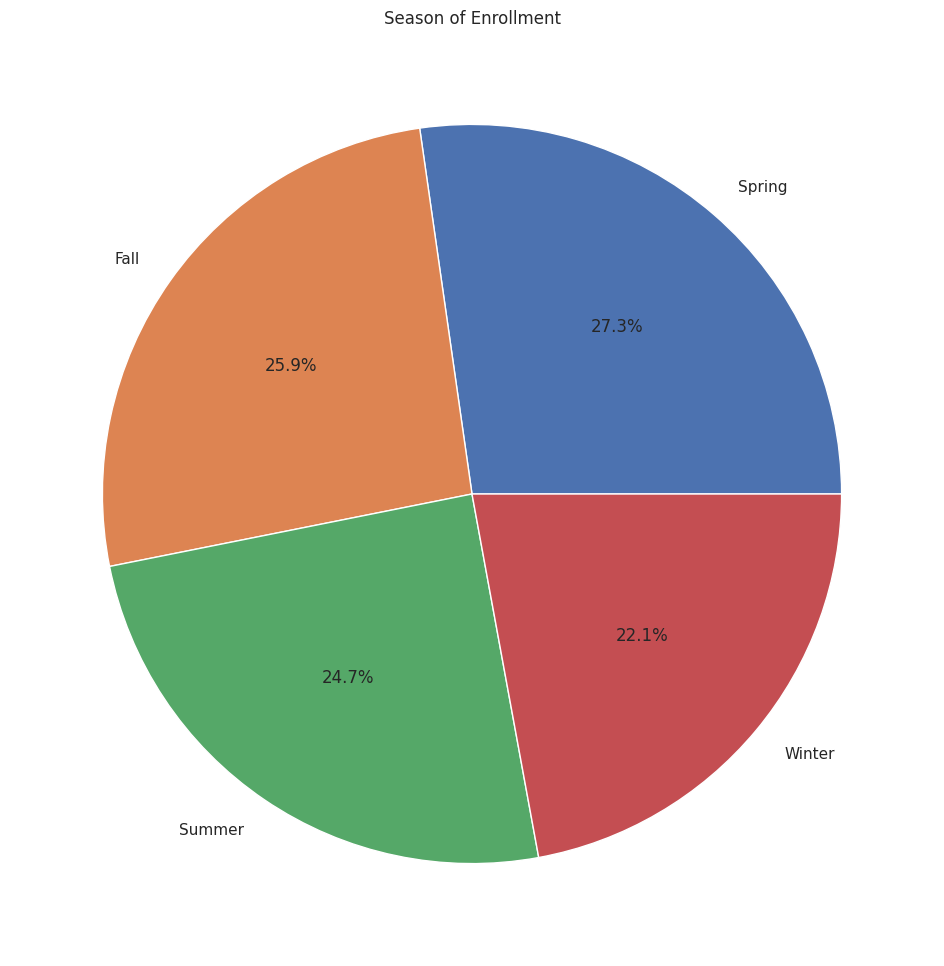

In [ ]:
# for the category data, I see they have seasons.
# so here I analyse the season occupying.
# plot 4: the pie plot for the season of Enrollment
# Get value counts for the column
vc = train['Basic_Demos-Enroll_Season'].value_counts()

# Create a pie chart
plt.pie(vc.values, labels=vc.index, autopct='%1.1f%%')  # Use `vc.values` for counts and `vc.index` for labels
plt.title('Season of Enrollment')
plt.show()


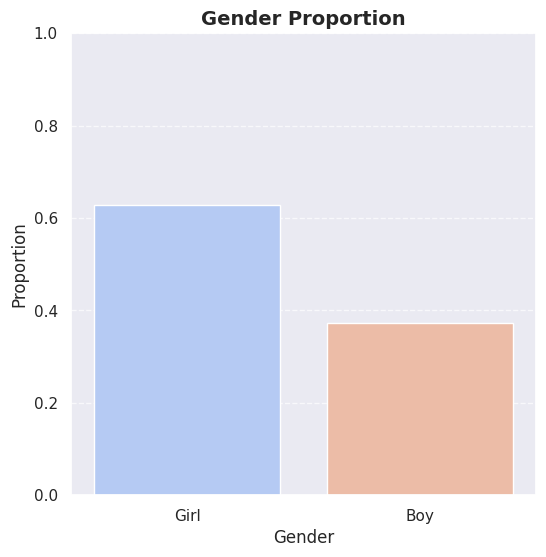

In [ ]:
# Also I analyse the gender of the participant.
# plot5: the distribution of the gender of the participant
# Map values: 0 = Girl, 1 = Boy
train_df['Basic_Demos-Sex'] = train_df['Basic_Demos-Sex'].map({0: 'Girl', 1: 'Boy'})

# Calculate the proportion of each gender
gender_counts = train_df['Basic_Demos-Sex'].value_counts(normalize=True)

# Plot proportions of genders
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="coolwarm")
plt.title("Gender Proportion", fontsize=14, fontweight="bold")
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


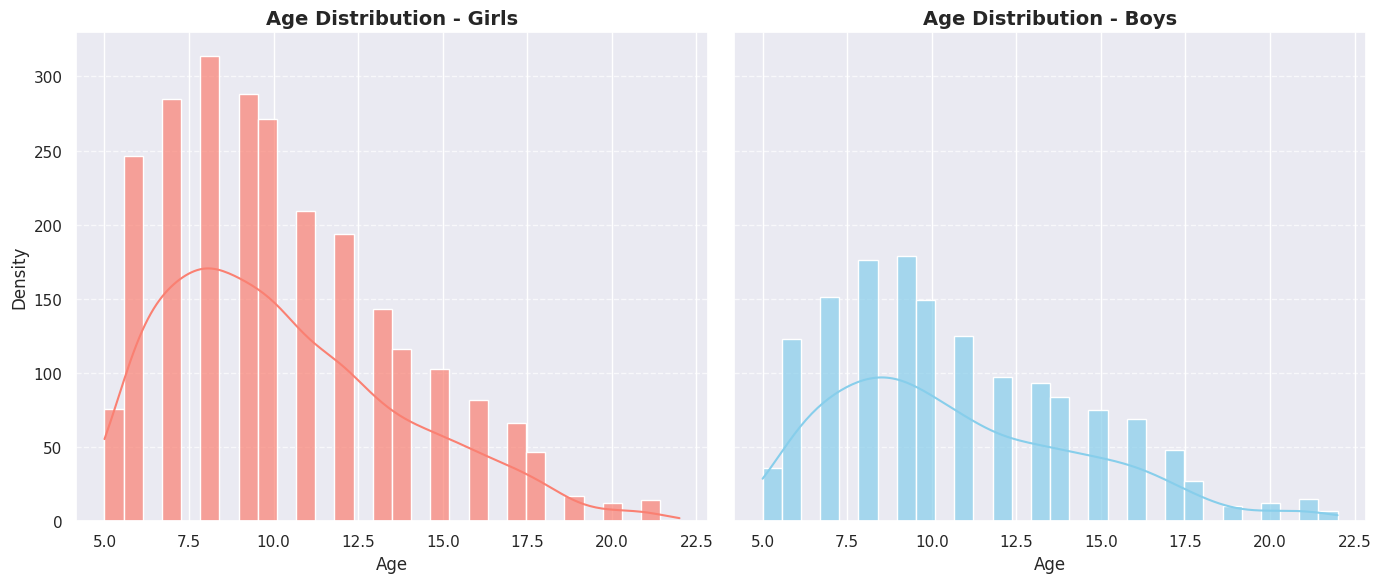

In [ ]:
# Plot6: the age distribution by gender
# Separate age distribution by gender into two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Filter data for each gender
girl_data = train_df[train_df['Basic_Demos-Sex'] == 0]
boy_data = train_df[train_df['Basic_Demos-Sex'] == 1]

# Plot for girls
sns.histplot(girl_data['Basic_Demos-Age'], kde=True, bins=30, color="salmon", alpha=0.7, ax=axes[0])
axes[0].set_title("Age Distribution - Girls", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Age", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for boys
sns.histplot(boy_data['Basic_Demos-Age'], kde=True, bins=30, color="skyblue", alpha=0.7, ax=axes[1])
axes[1].set_title("Age Distribution - Boys", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Age", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# 🌵 data cleaning and feature engineering!

## 🚛 Time Series Aggregation


> Time series statistics (e.g., mean, standard deviation) from the actigraphy data are computed and merged into the main dataset to create additional features for model training.
Thanks to the time series-aggredation data provided by the Professor, I used the mean and std from F24_DS_DL_finalProject_data_withID.



In [ ]:
# set path and read data
# mount to drive
from google.colab import drive
drive.mount('/content/drive')

dir_tsf = '/content/drive/My Drive/5509/Dataset/child-mind-institute-problematic-internet-use'
# Directory paths
parquet_dir = os.path.join(dir_tsf,'series_train.parquet')
# Load your train DataFrame (ensure you have this already)
train_df = pd.read_csv( '/content/drive/My Drive/5509/Dataset/train.csv') # '/content/drive/My Drive/5509/Dataset/train.csv'

# get train and test partition
dir_demo = '/content/drive/My Drive/5509/Dataset'
path_demo = os.path.join(dir_demo,'F24_DS_DL_finalProject_data_withID')
X_train_demo = pd.read_csv(os.path.join(path_demo,'X_train_F24_withID.csv'))
X_test_demo = pd.read_csv(os.path.join(path_demo,'X_test_F24_withID.csv'))
y_train_demo = pd.read_csv(os.path.join(path_demo,'y_train_F24_withID.csv'))
y_test_demo = pd.read_csv(os.path.join(path_demo,'y_test_F24_withID.csv'))

X_train_demo = X_train_demo.iloc[:, 1:]
X_test_demo = X_test_demo.iloc[:, 1:]

y_train_demo = y_train_demo.iloc[:, -2:]
y_test_demo = y_test_demo.iloc[:, -2:]

# join with id to get the project-required train and test partition!
train_demo = X_train_demo.merge(train_df, on='id', how='left')
test_demo = X_test_demo.merge(train_df, on='id', how='left')

# remove the PCIAT variables
train_demo = train_demo.loc[:, ~train_demo.columns.str.contains('PCIAT')]
test_demo = test_demo.loc[:, ~test_demo.columns.str.contains('PCIAT')]


# check the shape of train and test, here I have the average of parquet file
print("X_train_demo shape:", X_train_demo.shape)
print("X_test_demo shape:", X_test_demo.shape)
print("y_train_demo shape:", y_train_demo.shape)
print("y_test_demo shape:", y_test_demo.shape)

print("train_demo shape:", train_demo.shape)
print("test_demo shape:", test_demo.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X_train_demo shape: (796, 14)
X_test_demo shape: (200, 14)
y_train_demo shape: (796, 2)
y_test_demo shape: (200, 2)
train_demo shape: (796, 73)
test_demo shape: (200, 73)


## 🚛 missing-value check

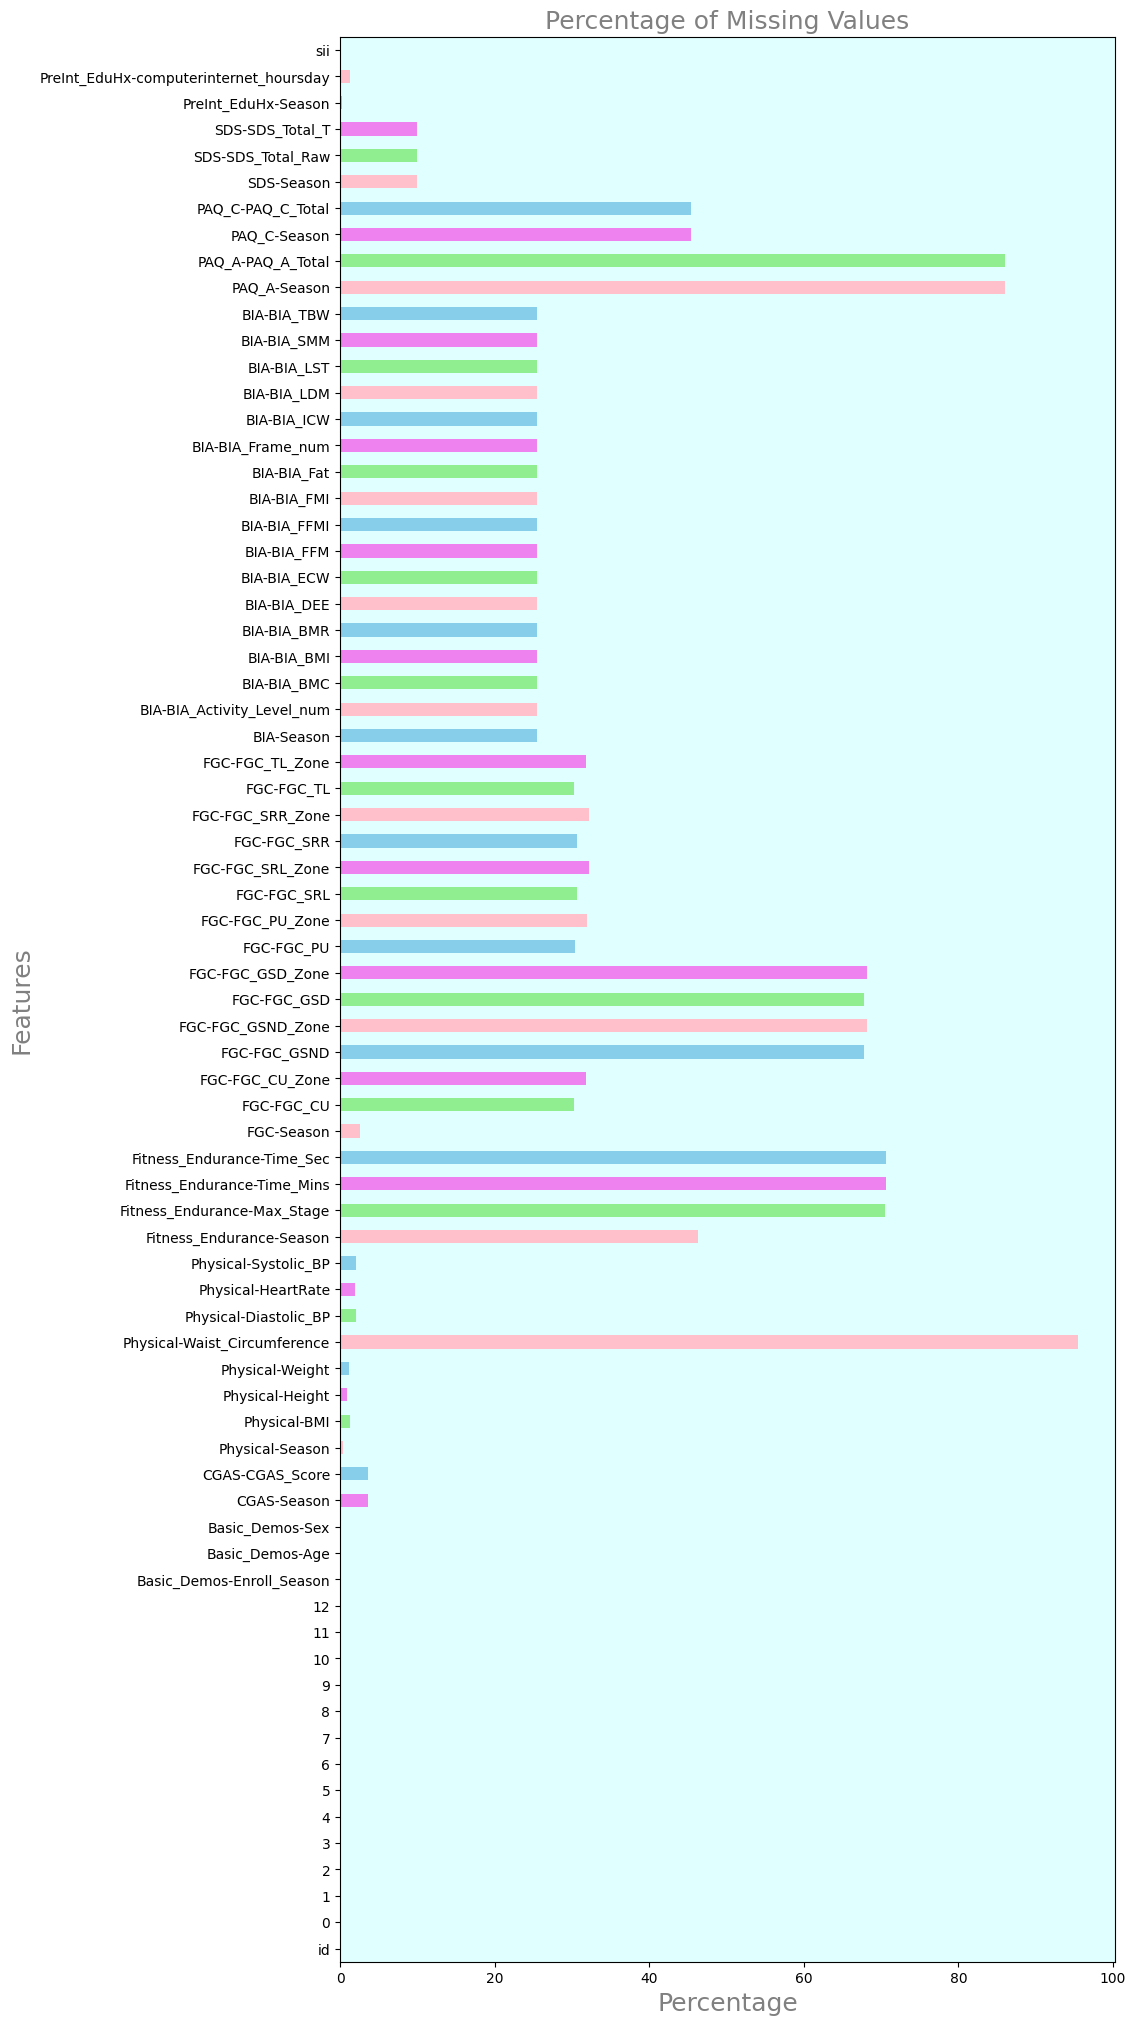

In [ ]:
import matplotlib.pyplot as plt
train = train_demo.copy()
test = test_demo.copy()

# the features in train_df
train_col = train.columns.tolist()
# the features in test_df
test_col = test.columns.tolist()

missing_values = train.isnull().mean() * 100
missing_values.plot(kind='barh', figsize=(10, 25), color=['lightgreen','violet','skyblue','pink'])

plt.title('Percentage of Missing Values', fontsize=18, color='gray')
plt.xlabel('Percentage', fontsize=18, color='gray')
plt.ylabel('Features', fontsize=18, color='gray')
plt.gca().set_facecolor('lightcyan')
plt.xticks(rotation=0)
plt.show();

In [ ]:
train = train_demo.copy()
test = test_demo.copy()

train_col = train.columns.tolist()
test_col = test.columns.tolist()
features = test_col.copy()
features.remove('id')
features.remove('sii')
print('Number of Features :', len(features))

# Numerical Features
num_features = [f for f in features if train[f].dtype==float or f=='Basic_Demos-Age' and f not in ['sii']]
print('The number of numerical features :', len(num_features))

# Categorical Features
cat_features = [f for f in features if f not in num_features and f not in ['id']] # here we remove 'sii' in the feature list!
print('The number of categorical features :', len(cat_features))

# Target Features
target_col = [f for f in train_col if f not in test_col or f=='sii']
print('The number of target features :', len(target_col), '\n')


Number of Features : 71
The number of numerical features : 60
The number of categorical features : 11
The number of target features : 1 



## 🚛 features selection and imputation

For numerical features, the "KNNImputer" library is used, and for categorical features, a new category called "unknown" is created for missing values.

In [ ]:
from sklearn.impute import KNNImputer
imputer_num = KNNImputer(n_neighbors=2, weights="uniform")

# .........................................................................
df_data = pd.concat([train, test], axis=0) # df_data include train_df and test_df

imputer_num.fit(df_data[num_features])
df_data[num_features] = imputer_num.transform(df_data[num_features])

for col in cat_features:
    df_data[col] = df_data[col].fillna('unknown')
    df_data[col] = df_data[col].astype('category')

# .........................................................................
df_data.shape, df_data.isnull().mean() * 100 , df_data.isnull().mean().sum()

((996, 73),
 id                                        0.0
 0                                         0.0
 1                                         0.0
 2                                         0.0
 3                                         0.0
                                          ... 
 SDS-SDS_Total_Raw                         0.0
 SDS-SDS_Total_T                           0.0
 PreInt_EduHx-Season                       0.0
 PreInt_EduHx-computerinternet_hoursday    0.0
 sii                                       0.0
 Length: 73, dtype: float64,
 0.0)

## 🚛 Categorical Feature Encoding



> Categorical features are mapped to numerical values using custom mappings for each unique category within the dataset. This ensures compatibility with machine learning algorithms that require numerical input.



In [ ]:
# before getting dummy, we need to drop id and then add the id back fot generator!
df_data_id = df_data['id']
df_data_for_dummy = df_data.drop(columns=['id'])
df_data_dummy = pd.get_dummies(df_data_for_dummy, columns=cat_features)
df_data_dummy['id'] = df_data_id


In [ ]:
print(df_data_dummy['id'] )

0      a0522c83
1      4a4a0f78
2      a8b0428d
3      6282e693
4      a4530b41
         ...   
195    7f44236f
196    df556fd2
197    0eddd8e5
198    22c72c4e
199    d6776176
Name: id, Length: 996, dtype: object


## 🚛 Split then Normalization!



> Here the data is first splited as train and test partition, then normalized using Minmaxscaler.

As the train and test partition is provided, here they are organized in two different dataframe and processed separtately.

As a result, it can avoid data leakage.



In [ ]:
# split the trainset and test set as the same as the project:
# first 796 as the trainset, and 200 as the testset
df_data_dummy_train = df_data_dummy.iloc[:796, :]
df_data_dummy_test = df_data_dummy.iloc[796:, :]

In [ ]:
# save id for train and test
id_train = df_data_dummy_train['id']
id_test = df_data_dummy_test['id']
# remove id from dummy_train and dummy_test
df_data_dummy_train = df_data_dummy_train.drop(columns=['id'])
df_data_dummy_test = df_data_dummy_test.drop(columns=['id'])

# save sii for train and test
sii_train = df_data_dummy_train['sii']
sii_test = df_data_dummy_test['sii']
# remove sii from dummy_train and dummy_test
df_data_dummy_train = df_data_dummy_train.drop(columns=['sii'])
df_data_dummy_test = df_data_dummy_test.drop(columns=['sii'])

# ......................................................................
# StandardScaler
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_code[num_features] = scaler.fit_transform(df_code[num_features])

# ......................................................................
# MinMaxScaler
# here we first drop 'sii', after scaling we add 'sii'back for generator!
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_data_dummy_train[num_features] = scaler.fit_transform(df_data_dummy_train[num_features])
df_data_dummy_test[num_features] = scaler.transform(df_data_dummy_test[num_features])

# ......................................................................
print(df_data_dummy_train.shape)
print(df_data_dummy_test.shape)

# add id and sii back for generator
df_data_dummy_train['id'] = id_train
df_data_dummy_train['sii'] = sii_train
df_data_dummy_test['id'] = id_test
df_data_dummy_test['sii'] = sii_test

# check the shape for generator
print(df_data_dummy_train.shape)
print(df_data_dummy_test.shape)


(796, 111)
(200, 111)
(796, 113)
(200, 113)


In [ ]:
print(df_data_dummy_train['id'])

0      a0522c83
1      4a4a0f78
2      a8b0428d
3      6282e693
4      a4530b41
         ...   
791    1a803bfe
792    40aae75f
793    e0869709
794    6dfe4a75
795    19098ef0
Name: id, Length: 796, dtype: object


In [ ]:
# normalize the sequential data
# Step 1: Compute the scaler for time-series data
def compute_time_series_scaler(train_data, parquet_dir, max_sequence_length, n_features):
    all_time_series = []
    for _, row in train_data.iterrows():
        file_id = row['id']
        parquet_file_path = os.path.join(parquet_dir, f"id={file_id}", "part-0.parquet")
        if os.path.exists(parquet_file_path):
            time_series_df = pd.read_parquet(parquet_file_path).iloc[:max_sequence_length, :n_features]
            all_time_series.append(time_series_df.values)
    all_time_series = np.vstack(all_time_series)
    scaler = MinMaxScaler()
    scaler.fit(all_time_series)
    return scaler

# Step 2: Initialize scalers
# Compute the MinMaxScaler for time-series data
parquet_dir = os.path.join(dir_tsf,'series_train.parquet')
# here I'm using the id in df_data_dummy_train to get scaler
# so only the train partition from the X_train provided by Prof are included (796 in total)
# to make sure there is no data leakage
time_series_scaler = compute_time_series_scaler(df_data_dummy_train, parquet_dir, max_sequence_length=1000, n_features=10)



KeyboardInterrupt: 

In [ ]:
# save this time series scaler
import joblib
path_scaler = '/content/drive/My Drive/5509/Dataset/time_series_scaler.pkl'
joblib.dump(time_series_scaler, path_scaler)

['/content/drive/My Drive/5509/Dataset/time_series_scaler.pkl']

In [ ]:
# load the scaler
import joblib
path_scaler = '/content/drive/My Drive/5509/Dataset/time_series_scaler.pkl'
time_series_scaler = joblib.load(path_scaler)

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pyarrow import parquet as pq

def normalize_and_save_train_data(train_data, parquet_dir, time_series_scaler, max_sequence_length, n_features, output_dir):
    """
    Normalize the time-series data in train_data using the provided scaler and save the results.

    Parameters:
    - train_data: DataFrame containing train IDs.
    - parquet_dir: Directory containing the parquet files for time-series data.
    - time_series_scaler: Fitted MinMaxScaler for normalizing time-series data.
    - max_sequence_length: Maximum sequence length for truncation or padding.
    - n_features: Number of features to normalize.
    - output_dir: Directory to save normalized parquet files.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for _, row in train_data.iterrows():
        file_id = row['id']
        parquet_file_path = os.path.join(parquet_dir, f"id={file_id}", "part-0.parquet")

        if os.path.exists(parquet_file_path):
            # Load and truncate/pad the time-series data
            time_series_df = pd.read_parquet(parquet_file_path).iloc[:max_sequence_length, :n_features]

            # Apply the scaler to normalize
            normalized_data = time_series_scaler.transform(time_series_df.values)

            # Create output folder for this id
            output_folder = os.path.join(output_dir, f"id={file_id}")
            os.makedirs(output_folder, exist_ok=True)

            # Save the normalized data back as part-0.parquet file in the respective id folder
            output_file_path = os.path.join(output_folder, "part-0.parquet")
            pd.DataFrame(normalized_data).to_parquet(output_file_path, index=False)

            print(f"Normalized and saved for ID: {file_id}")

# Parameters
output_dir = os.path.join(dir_tsf, 'series_train.parquet.train_normalized_796')  # Output directory

# Normalize and save training data
normalize_and_save_train_data(
    train_data=df_data_dummy_train,  # Replace with your actual train DataFrame
    parquet_dir=parquet_dir,        # Directory containing original parquet files
    time_series_scaler=time_series_scaler,  # Fitted MinMaxScaler from train partition
    max_sequence_length=1000,       # Replace with actual sequence length
    n_features=10,                  # Replace with actual number of features
    output_dir=output_dir           # Directory to save normalized data
)


Normalized and saved for ID: a0522c83
Normalized and saved for ID: 4a4a0f78
Normalized and saved for ID: a8b0428d
Normalized and saved for ID: 6282e693
Normalized and saved for ID: a4530b41
Normalized and saved for ID: 994ee014
Normalized and saved for ID: ad536dea
Normalized and saved for ID: 66f619e3
Normalized and saved for ID: 48e69212
Normalized and saved for ID: 0b7d9da6
Normalized and saved for ID: b9e90f7f
Normalized and saved for ID: f4d2f5af
Normalized and saved for ID: 8d8b8553
Normalized and saved for ID: fdf4691f
Normalized and saved for ID: ea544af3
Normalized and saved for ID: 8a77c3e9
Normalized and saved for ID: 87050a09
Normalized and saved for ID: fe3cbf02
Normalized and saved for ID: 8376acc5


KeyboardInterrupt: 

In [ ]:
# check the number of id file in the train partition
train_dir = os.path.join(dir_tsf, 'series_train.parquet.train_normalized_796')  # Output directory
print(len([name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]))

796


🔥 Here the number of the train ids is 796, which is the same with the X_train_F24_withID.csv.


In [ ]:
def normalize_time_series(test_data, parquet_dir, time_series_scaler, max_sequence_length, n_features, output_dir):
    """
    Normalize the time-series data in test_data using the provided scaler and save the results.

    Parameters:
    - test_data: DataFrame containing test IDs.
    - parquet_dir: Directory containing the parquet files for time series data.
    - time_series_scaler: Fitted Minmaxscaler for normalizing time series.
    - max_sequence_length: Maximum sequence length for truncation or padding.
    - n_features: Number of features to normalize.
    - output_dir: Directory to save normalized parquet files.
    """
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if not exists

    for _, row in test_data.iterrows():
        file_id = row['id']
        parquet_file_path = os.path.join(parquet_dir, f"id={file_id}", "part-0.parquet")

        if os.path.exists(parquet_file_path):
            # Load and truncate/pad the time-series data
            time_series_df = pd.read_parquet(parquet_file_path).iloc[:max_sequence_length, :n_features]

            # Apply the scaler to normalize
            normalized_data = time_series_scaler.transform(time_series_df.values)

            # Create output folder for this id
            output_folder = os.path.join(output_dir, f"id={file_id}")
            os.makedirs(output_folder, exist_ok=True)

            # Save the normalized data back as part-0.parquet file in the respective id folder
            output_file_path = os.path.join(output_folder, "part-0.parquet")
            pd.DataFrame(normalized_data).to_parquet(output_file_path, index=False)

            print(f"Normalized and saved for ID: {file_id}")

# Parameters
parquet_dir = os.path.join(dir_tsf,'series_train.parquet')
output_dir = os.path.join(dir_tsf,'series_train.parquet.test_normalized_200')   # Replace with your output directory path

# Apply normalization and save
normalize_time_series(
    test_data=df_data_dummy_test,
    parquet_dir=parquet_dir,
    time_series_scaler=time_series_scaler,
    max_sequence_length=1000,  # Replace with actual sequence length
    n_features=10,             # Replace with actual number of features
    output_dir=output_dir
)


Normalized and saved for ID: d8037389
Normalized and saved for ID: fa34f945
Normalized and saved for ID: 15f2e240
Normalized and saved for ID: 98ed2153
Normalized and saved for ID: 7187caec
Normalized and saved for ID: 3f1f23e7
Normalized and saved for ID: 464a75fb
Normalized and saved for ID: 26aeacdf
Normalized and saved for ID: a9c53cdb
Normalized and saved for ID: 93fda84a
Normalized and saved for ID: 108b8659
Normalized and saved for ID: 3268c574
Normalized and saved for ID: 119e181e
Normalized and saved for ID: fad07fce
Normalized and saved for ID: 338146bd
Normalized and saved for ID: a297d1b9
Normalized and saved for ID: 7bdbf66f
Normalized and saved for ID: 6a864b11
Normalized and saved for ID: 8f9c03c6
Normalized and saved for ID: 4b71830a
Normalized and saved for ID: c6d4b453
Normalized and saved for ID: 3b091b83
Normalized and saved for ID: 350dbeba
Normalized and saved for ID: 95d57ff9
Normalized and saved for ID: 4d61a44e
Normalized and saved for ID: 57de6095
Normalized a

In [ ]:
# check the number of id file in the test partition
test_dir = os.path.join(dir_tsf,'series_train.parquet.test_normalized_200')
print(len([name for name in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, name))]))

200


🔥 Here the number of the test ids is 200, which is the same with the X_test_F24_withID.csv.

**So there is no data leakage!**

# 🔵 Modeling: build a model using both sequential and tabular data

In [ ]:
# *************************
# parameter settings
# *************************
parquet_train_dir = os.path.join(dir_tsf, 'series_train.parquet.train_normalized_796')  # Output directory
parquet_test_dir = os.path.join(dir_tsf,'series_train.parquet.test_normalized_200') # Update this path
max_sequence_length = 1000
batch_size = 1
excluded_columns = ['id','sii']
demographic_features = [col for col in df_data_dummy_train.columns if col not in excluded_columns]
# get the number of demographic features
num_demographic_features = len(demographic_features)
print(num_demographic_features)
print(demographic_features)

111
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'Basic_Demos-Age', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday', 'Basic_Demos-

## 🔔 generate the train and test for the two-branch model

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler

class DataGenerator(Sequence):
    def __init__(self, csv_data, parquet_dir, max_sequence_length, demographic_features, batch_size=64):
        """
        Initialize the DataGenerator class.

        Parameters:
        - csv_data: DataFrame containing id, demographic features, and target labels.
        - parquet_dir: Path to the directory containing time-series parquet files.
        - max_sequence_length: Maximum length for time-series sequences.
        - demographic_features: List of column names representing demographic features.
        - batch_size: Batch size for training.
        """
        self.csv_data = csv_data
        self.parquet_dir = parquet_dir
        self.max_sequence_length = max_sequence_length
        self.batch_size = batch_size
        self.demographic_features = demographic_features
        self.on_epoch_end()

    def __len__(self):
        """
        Return the number of batches per epoch.
        """
        return int(np.floor(len(self.csv_data) / self.batch_size))

    def __getitem__(self, index):
        """
        Retrieve a batch of data at the specified index.

        Parameters:
        - index: The index of the batch to retrieve.

        Returns:
        - Tuple containing the inputs ([time_series_data, demographic_data]) and labels.
        """
        batch_data = self.csv_data.iloc[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__data_generation(batch_data)
        return (tuple(X), y)

    def on_epoch_end(self):
        """
        Perform actions at the end of each epoch.
        Removes rows with missing 'id' values and resets the index.
        """
        self.csv_data = self.csv_data.dropna(subset=['id']).reset_index(drop=True)

    def __data_generation(self, batch_data):
        """
        Generate a batch of data.

        Parameters:
        - batch_data: Subset of csv_data for the current batch.

        Returns:
        - X: List containing [time_series_data, demographic_data].
        - y: Labels for the current batch.
        """
        sequences = []
        demographics = []
        labels = []

        for _, row in batch_data.iterrows():
            file_id = row['id']
            parquet_file_path = os.path.join(self.parquet_dir, f"id={file_id}", "part-0.parquet")

            # Load time-series data
            if os.path.exists(parquet_file_path):
                time_series_df = pd.read_parquet(parquet_file_path).iloc[:self.max_sequence_length, :10]
                sequences.append(time_series_df)

                # Normalize demographic features
                demo_data = row[self.demographic_features].values.astype('float32')
                demographics.append(demo_data)

                # Add target labels
                labels.append(row['sii'])

        # Pad time-series data to the maximum sequence length
        X_time_series = pad_sequences(sequences, maxlen=self.max_sequence_length, padding='post', dtype='float32')
        X_demographics = np.array(demographics)
        y = np.array(labels)

        return [X_time_series, X_demographics], y


In [ ]:

# Step 3: Initialize DataGenerators
train_Generator = DataGenerator(
    csv_data=df_data_dummy_train,  # Training data
    parquet_dir=parquet_train_dir,  # Path to time-series parquet files
    max_sequence_length=max_sequence_length,  # Maximum sequence length
    demographic_features=demographic_features,  # List of demographic features
    batch_size=batch_size  # Batch size
)

val_Generator = DataGenerator(
    csv_data=df_data_dummy_test,  # Validation data
    parquet_dir=parquet_test_dir,  # Path to time-series parquet files
    max_sequence_length=max_sequence_length,  # Maximum sequence length
    demographic_features=demographic_features,  # List of demographic features
    batch_size=batch_size  # Batch size
)


In [ ]:
# generator check

num_batches = len(train_Generator)
print(f"Number of batches in train_Generator: {num_batches}")
num_batches = len(val_Generator)
print(f"Number of batches in val_Generator: {num_batches}")



Number of batches in train_Generator: 7
Number of batches in val_Generator: 2


🔥 Here we set ``batch_size =1`` to check the shape of train_Generator and test_Generator (named val_Generator in the script). The number of batches after generation in training and testing separately is equal to the number provided in the project.

🔥 **So there is no data leakage!**

In [ ]:
X, y = train_Generator[0]
print("Time-series data shape:", X[0].shape)
print("Demographic data shape:", X[1].shape)
print("Labels shape:", y.shape)

X, y = train_Generator[0]
print("Time-series data mean (approx):", X[0].mean(), "std (approx):", X[0].std())
print("Demographic data mean (approx):", X[1].mean(), "std (approx):", X[1].std())

X, y = val_Generator[0]
print("Time-series data mean (approx):", X[0].mean(), "std (approx):", X[0].std())
print("Demographic data mean (approx):", X[1].mean(), "std (approx):", X[1].std())


Time-series data shape: (50, 1000, 10)
Demographic data shape: (50, 111)
Labels shape: (50,)
Time-series data mean (approx): 0.3963244 std (approx): 0.32650167
Demographic data mean (approx): 0.29744592 std (approx): 0.3516026
Time-series data mean (approx): 0.3967776 std (approx): 0.32588568
Demographic data mean (approx): 0.2957691 std (approx): 0.3509354


In [ ]:
# save the train and val generator
import joblib
path_train_Generator = '/content/drive/My Drive/5509/Dataset/train_Generator.pkl'
joblib.dump(train_Generator, path_train_Generator)

path_val_Generator = '/content/drive/My Drive/5509/Dataset/val_Generator.pkl'
joblib.dump(val_Generator, path_val_Generator)

['/content/drive/My Drive/5509/Dataset/val_Generator.pkl']

## 🏛 Model training and Evaluation

## 💦 Hyperparameter Tuning

Here I fine tune the hyperparameter. After trying lots of params I show the best model with the params here.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Masking, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Time series input branch
input_time_series = Input(shape=(max_sequence_length, 10), name="time_series_input")
masked_input = Masking(mask_value=0.0)(input_time_series)
lstm_out = LSTM(256, return_sequences=True)(masked_input)
lstm_out = BatchNormalization()(lstm_out)
lstm_out = Dropout(0.5)(lstm_out)

# lstm_out = LSTM(256, return_sequences=True)(lstm_out)
# lstm_out = BatchNormalization()(lstm_out)
# lstm_out = Dropout(0.3)(lstm_out)

lstm_out = LSTM(128, return_sequences=True)(lstm_out)
lstm_out = BatchNormalization()(lstm_out)
lstm_out = Dropout(0.3)(lstm_out)

# lstm_out = LSTM(64, return_sequences=True)(lstm_out)
# lstm_out = BatchNormalization()(lstm_out)
# lstm_out = Dropout(0.3)(lstm_out)

lstm_out = LSTM(128, return_sequences=False)(lstm_out)
lstm_out = BatchNormalization()(lstm_out)
lstm_out = Dropout(0.4)(lstm_out)


# Demographic input branch
input_demo = Input(shape=(len(demographic_features),), name="demographic_input")
dense_demo = Dense(128, activation="relu")(input_demo)
dense_demo = BatchNormalization()(dense_demo)
dense_demo = Dropout(0.2)(dense_demo)

# Concatenate both branches
combined = Concatenate()([lstm_out, dense_demo])
combined = Dense(32, activation="relu")(combined)
combined = BatchNormalization()(combined)
combined = Dropout(0.2)(combined)

# Output layer
output = Dense(1, activation="sigmoid")(combined)

# def focal_loss(alpha=0.25, gamma=2.0):
#     def loss(y_true, y_pred):
#         bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
#         pt = tf.exp(-bce)
#         focal_loss = alpha * (1 - pt) ** gamma * bce
#         return focal_loss
#     return loss


# Compile the model
model = Model(inputs=[input_time_series, input_demo], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=["accuracy"])

# Print model summary
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=30,          # Stop training after 3 epochs with no improvement
    restore_best_weights=True,  # Restore the best weights
    verbose=1            # Print messages when stopping
)

# Train the model
history = model.fit(
    train_Generator,  # Training data generator
    validation_data=val_Generator,  # Validation data generator
    epochs=100,  # Increased number of epochs
    callbacks=[early_stopping],  # Add EarlyStopping callback
    verbose=1
)

# Evaluate the model
results = model.evaluate(val_Generator)
print(f"Validation Loss: {results[0]:.4f}, Validation Accuracy: {results[1]:.4f}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ time_series_input         │ (None, 1000, 10)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 1000, 10)       │              0 │ time_series_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking (Masking)         │ (None, 1000, 10)       │              0 │ time_series_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any (Any)                 │ (None, 1000)           │              0 │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 1000, 256)      │        273,408 │ masking[0][0],         │
│                           │                        │                │ any[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 1000, 256)      │          1,024 │ lstm[0][0], any[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 1000, 256)      │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 1000, 128)      │        197,120 │ dropout[0][0],         │
│                           │                        │                │ any[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 1000, 128)      │            512 │ lstm_1[0][0],          │
│ (BatchNormalization)      │                        │                │ any[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 1000, 128)      │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ demographic_input         │ (None, 111)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 128)            │        131,584 │ dropout_1[0][0],       │
│                           │                        │                │ any[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         14,336 │ demographic_input[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ lstm_2[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128)            │            512 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 627,393 (2.39 MB)

 Trainable params: 626,049 (2.39 MB)

 Non-trainable params: 1,344 (5.25 KB)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - accuracy: 0.4543 - loss: 0.9729 - val_accuracy: 0.5600 - val_loss: 0.6404
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.4823 - loss: 0.5665 - val_accuracy: 0.5550 - val_loss: 0.5917
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.5138 - loss: 0.4952 - val_accuracy: 0.5400 - val_loss: 0.5614
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.5446 - loss: 0.4545 - val_accuracy: 0.5300 - val_loss: 0.5450
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.5222 - loss: 0.3361 - val_accuracy: 0.5150 - val_loss: 0.5337
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.5384 - loss: 0.0992 - val_accuracy: 0.5200 - val_loss: 0.5105
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.5255 - loss: 0.1283 - val_accuracy: 0.4650 - val_loss: 0.5554
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.5765 - loss: 0.0684 - val_acc

In [ ]:
# save the best model in a file
model_save_path = "/content/drive/My Drive/5509/Dataset/trained_model.h5"  # Path to save the model
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /content/drive/My Drive/5509/Dataset/trained_model.h5


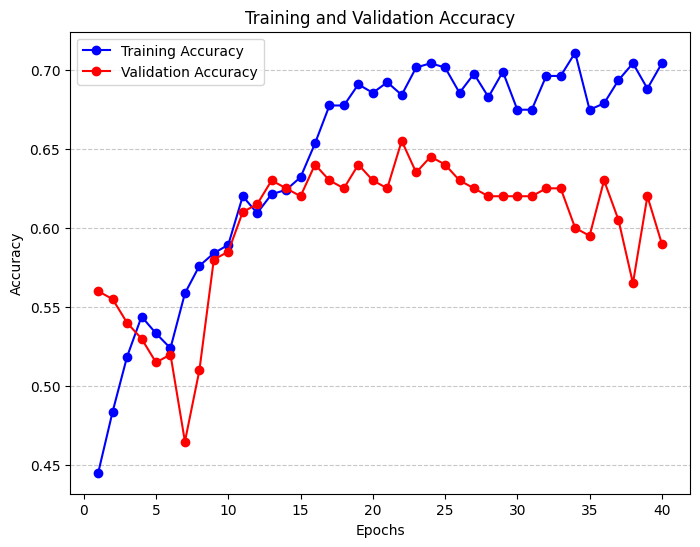

In [ ]:
import matplotlib.pyplot as plt

# Plot only accuracy curves
def plot_accuracy(history):
    # Extract metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Call the plotting function
plot_accuracy(history)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step


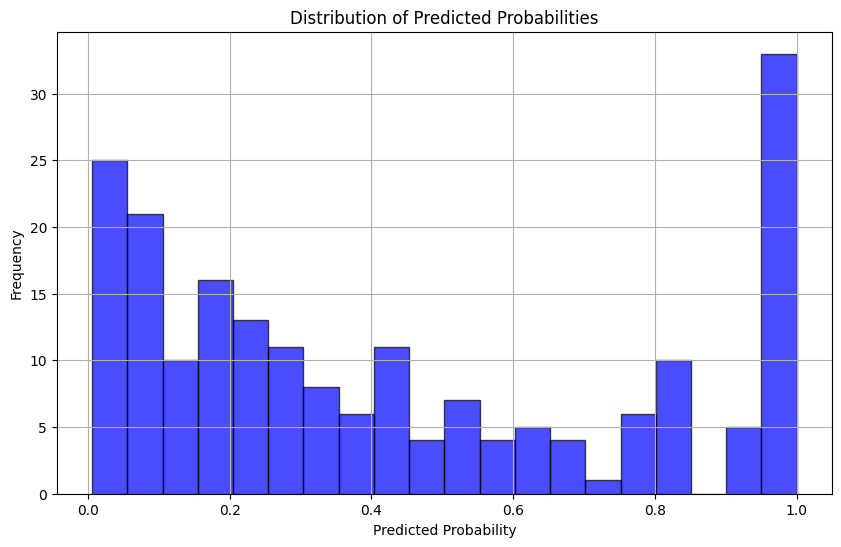

In [ ]:
y_pred_proba = model.predict(val_Generator)
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



# 🔥 Best model results: the highest weighted average F1 score is 0.79!

In [ ]:
y_train_true = y_train_demo['sii']

# Initialize variables to store the best threshold and highest F1-score
best_threshold = 0
highest_f1_score = 0
best_report = ""

# Predictions for training data
train_predictions = model.predict(train_Generator,batch_size=1)

# Iterate through thresholds from 0.3 to 0.6 with a step of 0.01
for threshold in np.arange(0.3, 0.61, 0.01):
    # Generate predicted labels based on the current threshold
    train_pred_labels = (train_predictions > threshold).astype(int).flatten()

    # Generate the classification report
    report = classification_report(y_train_true, train_pred_labels, output_dict=True)

    # Extract the weighted avg F1-score
    f1_score = report["weighted avg"]["f1-score"]

    # Update the best threshold and highest F1-score if this is the highest so far
    if f1_score > highest_f1_score:
        highest_f1_score = f1_score
        best_threshold = threshold
        best_report = classification_report(y_train_true, train_pred_labels)

# Output the best threshold and corresponding classification report
best_threshold, highest_f1_score, best_report

train_pred_labels = (train_predictions > best_threshold).astype(int).flatten()
best_report = classification_report(y_train_true, train_pred_labels)
print("Best Threshold:", best_threshold)
print("Highest weighted averaged F1-Score:", highest_f1_score)
print("Classification Report:")
print(best_report)

796/796 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step
Best Threshold: 0.4500000000000001
Highest weighted averaged F1-Score: 0.7916274316836228
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       463
           1       0.75      0.76      0.75       333

    accuracy                           0.79       796
   macro avg       0.79      0.79      0.79       796
weighted avg       0.79      0.79      0.79       796



In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_test_true = y_test_demo['sii']

# Initialize variables to store the best threshold and highest F1-score
best_threshold = 0
highest_f1_score = 0
best_report = ""

# Predictions for testing data
test_predictions = model.predict(val_Generator,batch_size=1)

# Iterate through thresholds from 0.3 to 0.6 with a step of 0.01
for threshold in np.arange(0.3, 0.61, 0.01):
    # Generate predicted labels based on the current threshold
    test_pred_labels = (test_predictions > threshold).astype(int).flatten()

    # Generate the classification report
    report = classification_report(y_test_true, test_pred_labels, output_dict=True)

    # Extract the weighted avg F1-score
    f1_score = report["weighted avg"]["f1-score"]

    # Update the best threshold and highest F1-score if this is the highest so far
    if f1_score > highest_f1_score:
        highest_f1_score = f1_score
        best_threshold = threshold
        best_report = classification_report(y_test_true, test_pred_labels)

# Output the best threshold and corresponding classification report
best_threshold, highest_f1_score, best_report

test_pred_labels = (test_predictions > best_threshold).astype(int).flatten()
best_report = classification_report(y_test_true, test_pred_labels)
print("Best Threshold:", best_threshold)
print("Highest weighted averaged F1-Score:", highest_f1_score)
print("Classification Report:")
print(best_report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
Best Threshold: 0.46000000000000013
Highest F1-Score: 0.7547378585036142
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       120
           1       0.70      0.69      0.69        80

    accuracy                           0.76       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.76      0.75       200



# 📙 Interpretability and Discussion

## 📖 Model building

**What model did I build except the two-branch deep-learning based model?**


1. ML model


*   Scenario 1: demographic + RF
*   Scenario 2: demographic + tsFresh minFC + RF
*   Scenario 3: demographic + tsFresh someFC + RF
*   Scenario 4: demographic + tsFresh efficientFC + RF

2. DL model

DNN:
*   Scenario 1: demographic + DNN
*   Scenario 2: demographic + tsFresh minFC + DNN
*   Scenario 3: demographic + tsFresh someFC + DNN
*   Scenario 4: demographic + tsFresh efficientFC + DNN
CNN:
*   Scenario 1: demographic + CNN
*   Scenario 2: demographic + tsFresh minFC + CNN
*   Scenario 3: demographic + tsFresh someFC + CNN
*   Scenario 4: demographic + tsFresh efficientFC + CNN
RNN:
*   Scenario 1: artigraphic (sequential time series) + RNN
*   Scenario 1: artigraphic (sequential time series) + LSTM


🔖 **Insight**

1. **Comparison between Deep Learning Models and Machine Learning Models:**


> When building models using only demographic data, the performance of deep learning models and machine learning models is similar. However, when using sequential data, deep learning models outperform machine learning models. This is because demographic data alone provides limited samples, whereas time-series data offers much more information.


2. **Demographic Data vs. Actigraphic Data:**


> Relying solely on demographic data may not be sufficient. When using only demographic data, both machine learning models (e.g., RF) and deep learning models (e.g., DNN, CNN) achieve an F1 score of around 0.6–0.65. However, when combining both types of data, the model's performance improves significantly, with a weighted average F1 score of **0.79**.

3. **Underfitting and Overfitting in Model Tuning:**


> When tuning a model, it is essential to first allow the model to fit the data adequately or even overfit, and then proceed with tuning to find the most suitable parameters.

4. **the limition of increasing features from package like TSFresh**

> I also attempted to use TSFresh as additional features for modeling (the code is omitted in the project). However, adding TSFresh features resulted in only limited improvement to the model's performance. For RF, the F1 score remained around 0.65 (compared to the previous 0.63). For DNN, the F1 score improved to 0.67, but it still falls significantly short of the results achieved by deep learning models.

> The impact of feature selection is also limited. I used methods such as correlation analysis, importance analysis, and the feature extraction approach provided by TSFresh to perform feature selection. However, after modeling with the selected features, the F1 score still ranged between 0.65 and 0.68.

5. **the importance of different type of features in the DL model**

> It is useful and necessary to use two-branch deep-learning based model to train the demographic data and artigraphic data at the same time. Solely using deep learning models, such as LSTM, for learning time-series data only achieves an F1 score of 0.7.




## 📗 Business suggestion

### ⭐ Feature Importance for Demographic Branch: Permutation importance

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def permutation_importance_demo_branch(model, val_Generator, demographic_features, base_accuracy):
    feature_importance = {}
    for feature_idx, feature_name in enumerate(demographic_features):
        # Backup original demographic data
        original_data = val_Generator.csv_data[feature_name].copy()

        # Shuffle this feature
        val_Generator.csv_data[feature_name] = np.random.permutation(original_data)

        # Evaluate model accuracy with shuffled feature
        results = model.evaluate(val_Generator, verbose=0)
        new_accuracy = results[1]

        # Calculate drop in accuracy
        feature_importance[feature_name] = base_accuracy - new_accuracy

        # Restore the original data
        val_Generator.csv_data[feature_name] = original_data

    return feature_importance

# Base accuracy before permutation
base_results = model.evaluate(val_Generator, verbose=0)
base_accuracy = base_results[1]

# Compute permutation importance for demographic features
demographic_feature_importance = permutation_importance_demo_branch(
    model, val_Generator, demographic_features, base_accuracy
)

# Sort features by importance and print
sorted_importance = sorted(demographic_feature_importance.items(), key=lambda x: x[1], reverse=True)
# print("Feature Importance (Demographic Branch):")
# for feature, importance in sorted_importance:
#     print(f"{feature}: {importance:.4f}")


In [ ]:
# here I combine the actigraphy (mean and std) from the time series as one group to evaluate the importance
# Combine importance of features named '0-12' into a new feature
combined_importance = 0
for feature, importance in sorted_importance:
    if feature in map(str, range(13)):  # Check if feature name is '0', '1', ..., '12'
        combined_importance += importance

# Create a new list of features with the combined feature
updated_importance = [
    (feature, importance)
    for feature, importance in sorted_importance
    if feature not in map(str, range(13))  # Exclude '0-12'
]

# Add the new combined feature
updated_importance.append(("actigraphy from time series", combined_importance))

# Sort the updated importance by value
updated_importance_sorted = sorted(updated_importance, key=lambda x: x[1], reverse=True)

# Get the top 10 features
top_10_features = updated_importance_sorted[:10]

# Print the top 10 features
print("Top 10 Features by Importance:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance:.4f}")


Top 10 Features by Importance:
PreInt_EduHx-computerinternet_hoursday: 0.0350
BIA-Season_Fall: 0.0150
FGC-FGC_SRR_Zone: 0.0100
SDS-SDS_Total_T: 0.0100
Basic_Demos-Enroll_Season_Winter: 0.0100
Basic_Demos-Sex_0: 0.0100
Physical-Season_Winter: 0.0100
FGC-Season_Summer: 0.0100
SDS-Season_Summer: 0.0100
Basic_Demos-Age: 0.0050


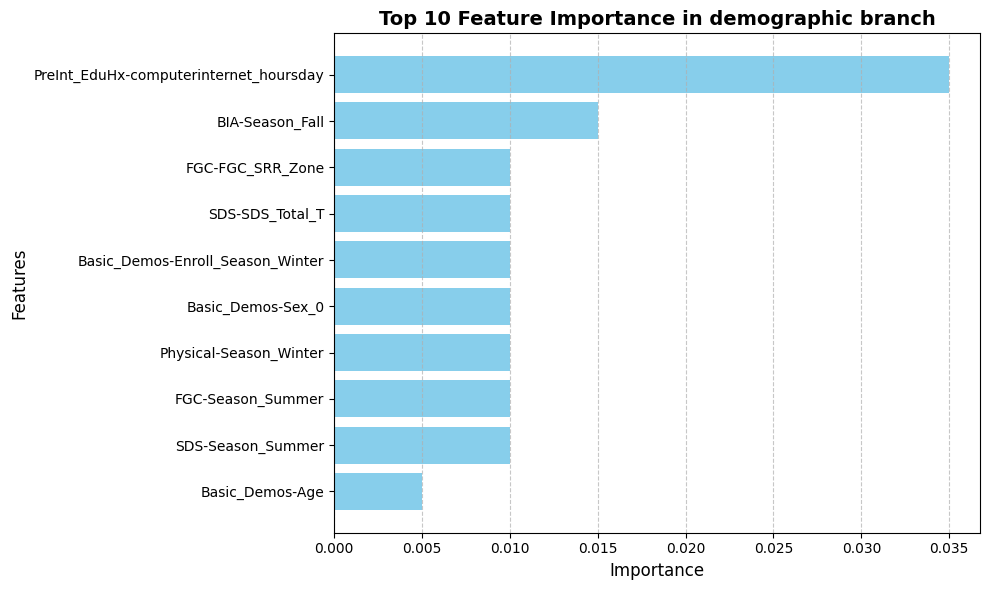

In [ ]:
import matplotlib.pyplot as plt

# Extract feature names and importance values for the top 10 features
top_features = [item[0] for item in top_10_features]
top_importances = [item[1] for item in top_10_features]

# Plot the top 10 feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importance in demographic branch', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Reverse the order to show the most important at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🌟 Feature Importance for Time-Series Branch

Occlude (mask) one time-series feature at a time or a specific time step and measure the model's performance.

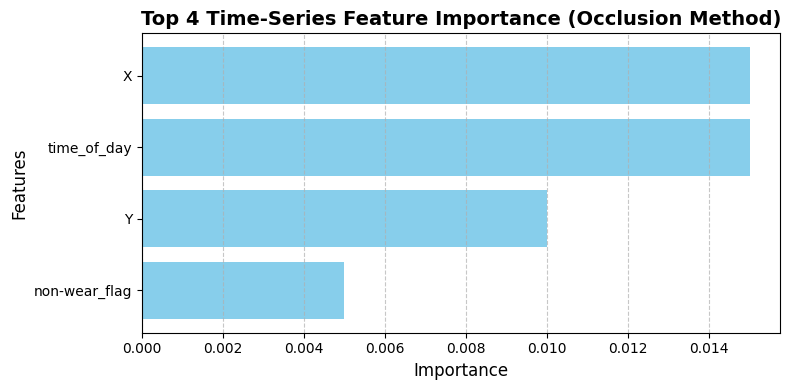

In [ ]:
def occlusion_importance_time_series(model, val_Generator, time_series_length, feature_index):
    base_results = model.evaluate(val_Generator, verbose=0)
    base_accuracy = base_results[1]
    accuracy_drop = []

    for batch_idx in range(len(val_Generator)):
        X_time_series, X_demo = val_Generator[batch_idx][0]
        y_true = val_Generator[batch_idx][1]

        # Mask specific time-series feature
        X_time_series[:, :, feature_index] = 0

        # Evaluate with the occluded feature
        results = model.evaluate([X_time_series, X_demo], y_true, verbose=0)
        accuracy_drop.append(base_accuracy - results[1])

    return np.mean(accuracy_drop)

# Example usage for features in the time-series
feature_importance_time_series = {}
for feature_idx in range(10):  # Assuming 10 features in the time-series
    drop = occlusion_importance_time_series(model, val_Generator, max_sequence_length, feature_idx)
    feature_importance_time_series[parquet_feature_names[feature_idx]] = drop  # Use feature names from parquet_feature_names

# Sort feature importance
sorted_importance = sorted(feature_importance_time_series.items(), key=lambda x: x[1], reverse=True)

# Extract sorted features and importance values
features = [item[0] for item in sorted_importance]
importance_values = [item[1] for item in sorted_importance]

# Extract the top 4 features and their importance values
top_features = features[:4]
top_importance_values = importance_values[:4]

# Plot the top 4 feature importance
plt.figure(figsize=(8, 4))
plt.barh(top_features, top_importance_values, color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 4 Time-Series Feature Importance (Occlusion Method)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Reverse order to show the most important features at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Business Recommendations**



1. Increased Computer/Internet Usage Hours: The feature PreInt_EduHx-computerinternet_hoursday has the highest importance, suggesting that higher daily computer or internet usage hours are strongly associated with problematic internet usage. This indicates that excessive time spent online could be a critical risk factor.

2. Seasonal Influence: Features like BIA-Season_Fall, Basic_Demos-Enroll_Season_Winter, and Physical-Season_Winter are among the top contributors. This suggests that the season, particularly Fall and Winter, may have a correlation with problematic internet usage, possibly due to reduced outdoor activities or weather-related constraints leading to increased indoor and online activities.

3. Physical Activity and Behavior Patterns (X, Y, Z, enmo, time_of_day):
The importance of features like X, Y, and time_of_day suggests that physical activity and its patterns throughout the day play a significant role in problematic internet usage. For example:

* X, Y: Indicate wrist acceleration, which correlates with physical activity or sedentary behavior.
* enmo: Highlights periods of no motion, which may align with prolonged sedentary periods often associated with extended internet usage.
* time_of_day: Reflects activity timing, suggesting a relationship between internet usage patterns and daily routines.

4. Device Usage and Wearing Behavior (non-wear_flag):
The feature non-wear_flag suggests that periods when the wristwatch is not worn may relate to problematic internet usage. This could imply that individuals might remove the watch during prolonged sedentary activities, such as excessive internet browsing or gaming sessions. This behavior might provide indirect evidence of when problematic usage occurs.

# Conclusion

1. The two-branch deep-learning-based model leveraging LSTM and DNN achieved the highest F1 scores of 0.79, making it the top-performing models. The model can train the sequential data and the demographic data at the same time, making the model learn from suffient data.

2. It is worth noticing that utilizing both demographic and artigraphic (time seires data) data. can contribute to the model and make the model perform well. Also, generating statics from the time series, such as mean and std is also useful.

3. Compared with machine learning model, such as RF, or one single DL model, such as DNN, CNN, RNN, and LSTM, the two-branch DL-based model get the best weighted averaged F1 score as 0.79. That is based on using both demographic and artigraphic (time seires data).

4. Several strategies are applied to build the model, such as using SMOTE to balance the samples, using TSFresh to increase the features, and using feature selection to drop irrelevant features. The results show that all these strategies can only get an F1 score of 0.65 to 0.68. while the two-branch DL model has a better performance.

5. Based on the feature importance analysis, factors such as physical activity patterns (X, Y, enmo), time of day, and device-wearing behavior (non-wear_flag) are key indicators of problematic internet usage. To mitigate this issue, promoting regular physical activity, healthy screen-time routines, and leveraging wearable insights for personalized interventions can help foster balanced internet usage.

